<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week7/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046

https://github.com/noora20FH/PCVK/blob/week7/week7.ipynb 

#PRACTICUM

In [1]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

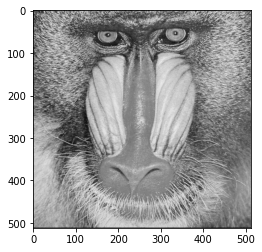

In [3]:
  #load the image
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


#Image Sharpen

In [4]:
  #image sharpen
kernel_sharpen = np.array([
      [0,-1,0],
      [-1,5,-1],
      [0,-1,0]
  ])


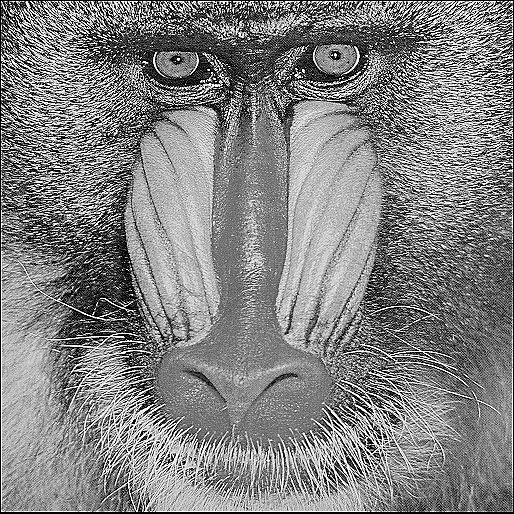

In [5]:
def convolution2d(image, kernel, stride, padding):
    # Get image and kernel dimensions
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Compute the output image dimensions
    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    # Create a new image with the output dimensions
    output = np.zeros((out_rows, out_cols))

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Loop over the rows and columns of the output image
    for row in range(out_rows):
        for col in range(out_cols):
            # Loop over the rows and columns of the kernel
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    # Compute the corresponding row and column in the padded input image
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    # Accumulate the sum of the element-wise product of the kernel and input image portion
                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            # Assign the sum to the corresponding position in the output image
            output[row, col] = sum

    return output

filtered_image = convolution2d(img_gray, kernel_sharpen,1,2)
cv2_imshow(filtered_image)


#Emboss

In [6]:
  #image EMboss
kernel_emboss = np.array([
      [-2,-1,0],
      [-1,1,1],
      [0,1,2]
  ])


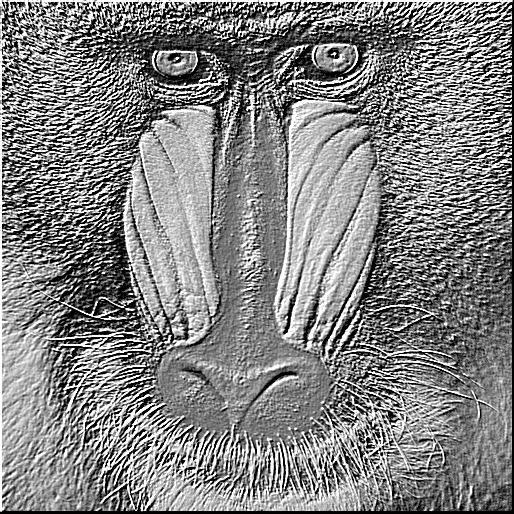

In [7]:
filtered_image2 = convolution2d(img_gray, kernel_emboss,1,2)
cv2_imshow(filtered_image2)

#Left Sobel Edge Detection

In [8]:
  #image Left Sobel Edge Detection
kernel_left_sobel_edge = np.array([
      [1,0,-1],
      [2,0,-2],
      [1,0,-1]
  ])


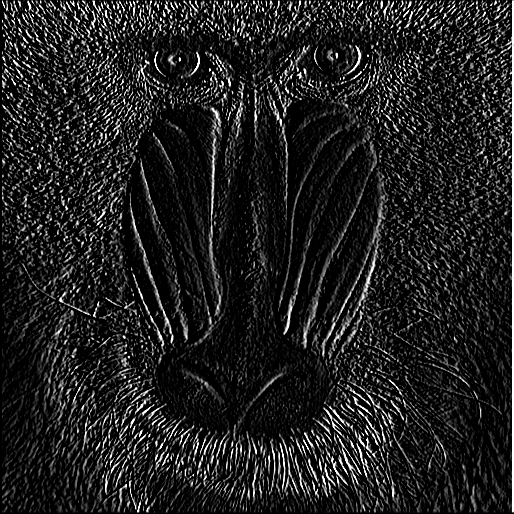

In [9]:
filtered_image3 = convolution2d(img_gray, kernel_left_sobel_edge,1,2)
cv2_imshow(filtered_image3)

#Canny Edge Detection

In [10]:
  #image Left Sobel Edge Detection
kernel_canny_edge_detection = np.array([
      [-1,-1,-1],
      [-1,8,-1],
      [-1,-1,-1]
  ])


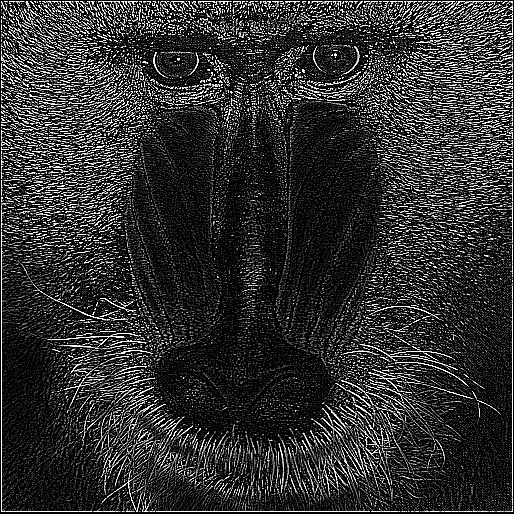

In [11]:
filtered_image4 = convolution2d(img_gray, kernel_canny_edge_detection,1,2)
cv2_imshow(filtered_image4)

#21 x 21 Gaussian Blur

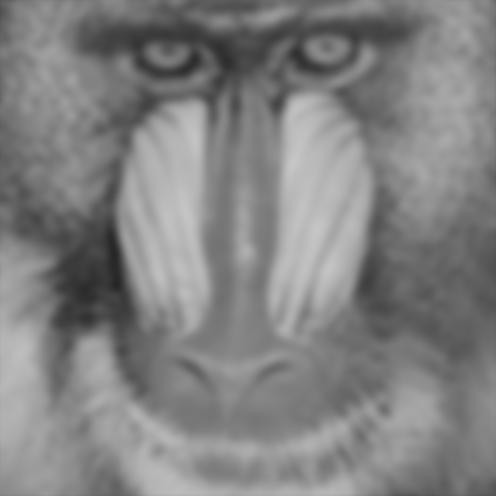

In [21]:
def convolution2d(image, kernel, stride, padding):
    # Get image and kernel dimensions
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    # Compute the output image dimensions
    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    # Create a new image with the output dimensions
    output = np.zeros((out_rows, out_cols))

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Loop over the rows and columns of the output image
    for row in range(out_rows):
        for col in range(out_cols):
            # Loop over the rows and columns of the kernel
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    # Compute the corresponding row and column in the padded input image
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    # Accumulate the sum of the element-wise product of the kernel and input image portion
                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            # Assign the sum to the corresponding position in the output image
            output[row, col] = sum

    return output


# Create a 21x21 Gaussian blur filter
# size = 21
# sigma = 5
# x, y = np.meshgrid(np.linspace(-10, 10, size), np.linspace(-10, 10, size))
# kernel = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
# kernel /= kernel.sum()

# Create a 21x21 Gaussian blur filter using the provided Gaussian kernel

kernel_size = 21
sigma = np.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

filtered_image5 = convolution2d(img_gray, gauss_kernel,1,2)
cv2_imshow(filtered_image5)

#Average Filter

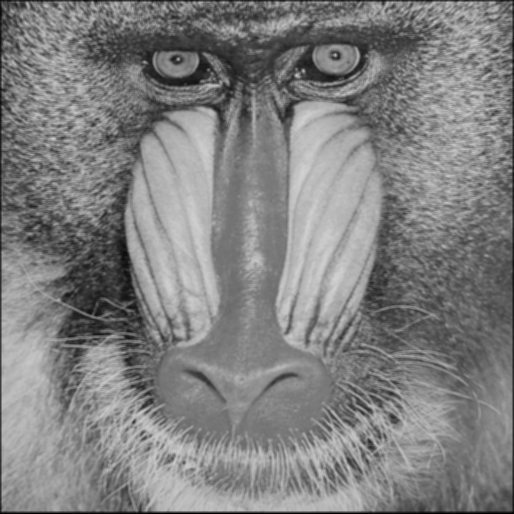

In [22]:
# Define a 3x3 average filter
#np.ones = fill the matrix with 1s value
# average_kernel = np.ones((3, 3)) / 9.0
kernel_size = 3
average_kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

filtered_image6 = convolution2d(img_gray, average_kernel,1,2)
cv2_imshow(filtered_image6)

#Low Pass Filter


This kernel assigns higher weights to the center pixel and lower weights to the surrounding pixels, with a total sum of 12

In [35]:
  #image Low Pass Filter
kernel_low_pass = np.array([
      [1,1,1],
      [1,4,1],
      [1,1,1]
  ]) / 12


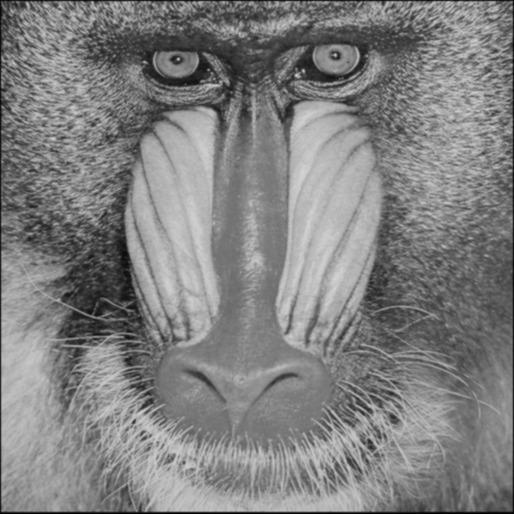

In [37]:

filtered_image11 = convolution2d(img_gray, kernel_low_pass,1,2)
cv2_imshow(filtered_image11)

One common LPF kernel is the Gaussian kernel.

This function generates a Gaussian kernel of the specified size and standard deviation (sigma).

In [33]:
import math

def gaussian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = math.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

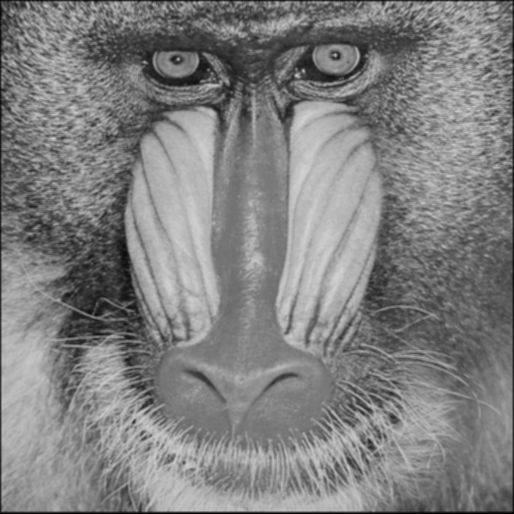

In [34]:
kernel_size = 3
sigma = 1.4
kernel = gaussian_kernel(kernel_size, sigma)


filtered_image7 = convolution2d(img_gray, kernel,1,2)
cv2_imshow(filtered_image7)


#High Past Filter


One common LPF kernel is the Box filter, which assigns equal weights to all the pixels within the kernel

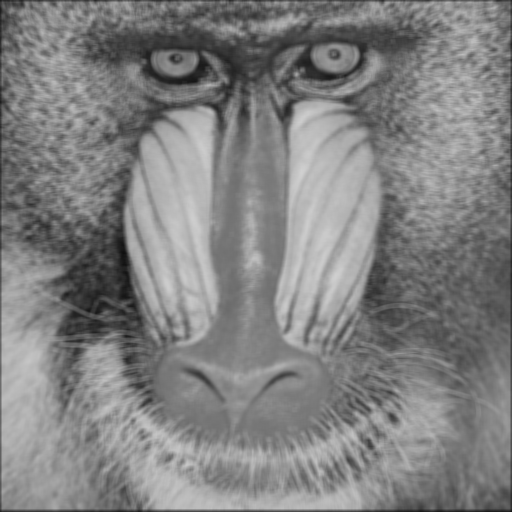

In [32]:
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

filtered_image8 = convolution2d(img_gray, kernel,1,2)
cv2_imshow(filtered_image8)


the kernel matrix that already determined

In [30]:
  #image High Pass Filter
kernel_high_pass = np.array([
      [-1,0,1],
      [-1,0,3],
      [-3,0,1]
  ])


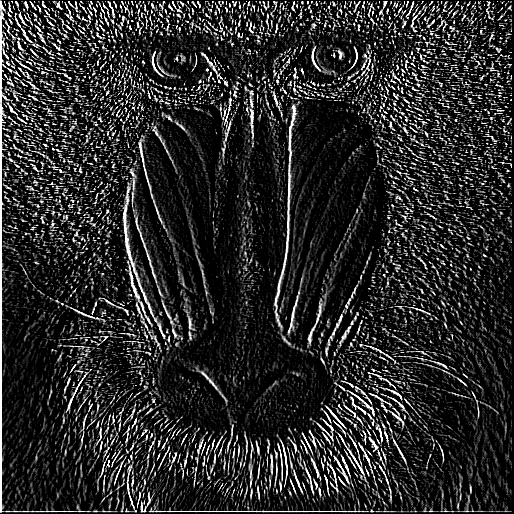

In [31]:
filtered_image9 = convolution2d(img_gray, kernel_high_pass,1,2)
cv2_imshow(filtered_image9)